<a href="https://colab.research.google.com/github/wayaadhyasta/Studi-Kasus-Machine-Learning/blob/main/DataSiswaK_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('/content/drive/MyDrive/data_siswa.csv')
dt

,Jam_Belajar,Nilai_Ujian,Status_Kelulusan
0,2,40,0
1,3,50,0
2,1,30,0
3,5,70,1
4,8,85,1
5,7,80,1
6,4,60,1
7,6,75,1
8,9,90,1
9,10,95,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
X = dt[['Jam_Belajar', 'Nilai_Ujian']]
y = dt['Status_Kelulusan']


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Pemisahan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [7]:
# Implementasi K-NN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
print(X_train)

[[ 0.17407766  0.36115756]
 [-1.5666989  -1.8057878 ]
 [ 1.5666989   1.32424438]
 [ 0.87038828  0.84270097]
 [-0.17407766  0.12038585]
 [-0.52223297 -0.36115756]]


In [13]:
print(X_test)

[[ 1.21854359  1.08347268]
 [-0.87038828 -0.84270097]
 [ 0.52223297  0.60192927]
 [-1.21854359 -1.32424438]]


In [14]:
# Prediksi dan evaluasi
y_predict = model.predict(X_test)

In [15]:
# Evaluasi Model
print("Akurasi Model:", accuracy_score(y_test, y_predict))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_predict))

Akurasi Model: 0.5
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


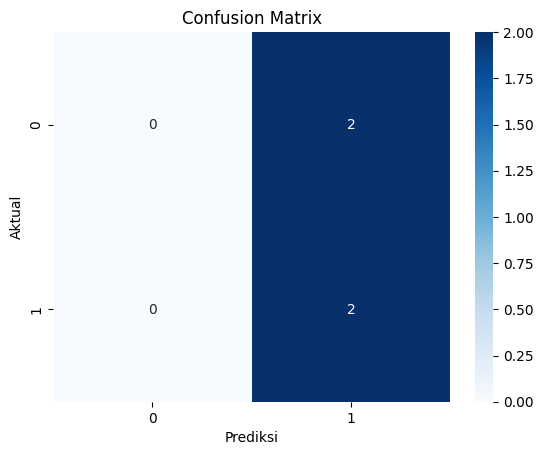

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()